<a href="https://colab.research.google.com/github/wisawapan/Automatic-email/blob/master/mnistDemo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
tf.__version__

'1.15.2'

In [ ]:
######################################################################
# Modify by Boonserm from ... 
# TensorFlow test example prepared by Adrian Bevan (a.j.bevan@qmul)
# for use with the material found at:
#
# https://pprc.qmul.ac.uk/~bevan/statistics/TensorFlow.html
#
# Feb 2017
######################################################################

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import input_data
import time

# function to create weights with a randomly chosen initialisation.
# this is important for the large number of hyperparameters we have in
# the CNN; and in particular for the relu activation function.
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

# function to create biases with a randomly chosen initialisation.
# this is important for the large number of hyperparameters we have in
# the CNN; and in particular for the relu activation function.
def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

# Create a 2D convolutional layer
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

# Create a 2D convolutional layer with Strides: n x n
def conv2d_n(x, W, n):
  return tf.nn.conv2d(x, W, strides=[1, n, n, 1], padding='SAME')

# create a max pooling kernel: 2 x 2
def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

# create a max pooling kernel: n x n
def max_pool_nxn(x,n):
  return tf.nn.max_pool(x, ksize=[1, n, n, 1],
                        strides=[1, n, n, 1], padding='SAME')


def calAcc():
# When the training finishes we should compute the accuracy of the final network on test, train 
# and also the validation samples.  This is important in order to get comparative benchmarks and demonstrate
# that the performance is repeatable on different samples of events, including those previously unseen
# events.
#train_accuracy = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})
#test_accuracy = accuracy.eval(feed_dict={x: mnist.train.images, y_: mnist.train.labels, keep_prob: 1.0})
#val_accuracy  = accuracy.eval(feed_dict={x: mnist.validation.images, y_: mnist.validation.labels, keep_prob: 1.0})

  strain_accuracy = 0
  stest_accuracy = 0
  sval_accuracy = 0
  noloop=10
  for i in range(noloop):
    batch_trnx, batch_trny = mnist.train.next_batch(int(notrain/noloop))
    batch_tstx, batch_tsty = mnist.test.next_batch(int(notest/noloop))
    batch_valx, batch_valy = mnist.validation.next_batch(int(noval/noloop))
    train_accuracy = accuracy.eval(feed_dict={x: batch_trnx, y_: batch_trny, keep_prob: 1.0})
    test_accuracy = accuracy.eval(feed_dict={x: batch_tstx, y_: batch_tsty, keep_prob: 1.0})
    val_accuracy  = accuracy.eval(feed_dict={x: batch_valx, y_: batch_valy, keep_prob: 1.0})
    strain_accuracy += train_accuracy 
    stest_accuracy += test_accuracy 
    sval_accuracy += val_accuracy 

  strain_accuracy /= noloop
  stest_accuracy /= noloop
  sval_accuracy /= noloop

  print(" accuracy for the train set examples      = " , strain_accuracy)
  print(" accuracy for the test set examples       = " , stest_accuracy)
  print(" accuracy for the validation set examples = " , sval_accuracy)
  return strain_accuracy, stest_accuracy, sval_accuracy

Importing the MNIST data
Instructions for updating:
Please write your own downloading logic.
Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz


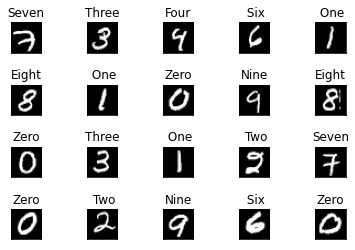

In [ ]:
# read in the data and start an interactive session
print("Importing the MNIST data")
mnist = input_data.read_data_sets("./mnist/", one_hot=True)

# set no. of each data set
notrain=len(mnist.train.labels)
noval=len(mnist.validation.labels)
notest=len(mnist.test.labels)
    
# the usual placeholders
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

fig=plt.figure()
fig.subplots_adjust(wspace=1.5, hspace=1)
pN=["Zero","One", "Two","Three","Four","Five","Six","Seven","Eight","Nine"]
for example in range(20):
  data = mnist.train.images[example:example+1,:]
  label = mnist.train.labels[example:example+1,:]
  image = data[0].reshape([28,28])
  a = fig.add_subplot(4,5,example+1)
  a.set_title('%4s' % pN[label[0].argmax(axis=0)])
  plt.imshow(image,cmap=plt.get_cmap('gray'))
  a.axes.get_xaxis().set_visible(False)
  a.axes.get_yaxis().set_visible(False)
plt.show()  

In [ ]:
# first convolutional layer; this is a 5 x 5 patch size with 1 input and 32 outputs.
# the re-shaped image has the number of colour channels as the last dimension, and 
# the image shape as the middle two.
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
x_image = tf.reshape(x, [-1,28,28,1])

# convolution of reshaped image with the weight tensor and apply the 
# bias offset. This is input to a relu function; followed by the 
# maxpooling step.
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# second convolutional layer; as before a 5 x 5 patch size with 32 inputs
# and now 64 outputs.
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

# convolution of maxpooled image with the weight tensor and apply the
# bias offset for the second layer applied. This is input to a relu function; 
# followed by the maxpooling step.
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# Now we contruct a fully connected layer working from a 7x7 image with 
# 64 outputs and 1024 neurons.
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# this is the readout layer where we flatten the 1024 outputs of the previous
# densely connected layer into evidence for the 10 possible types
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

step     0, training accuracy 0.2000  validation accuracy 0.0940
step   100, training accuracy 0.8400  validation accuracy 0.8580
step   200, training accuracy 0.9000  validation accuracy 0.9060
step   300, training accuracy 0.9200  validation accuracy 0.9380
step   400, training accuracy 0.9800  validation accuracy 0.9220
step   500, training accuracy 0.9800  validation accuracy 0.9240
step   600, training accuracy 0.9400  validation accuracy 0.9500
step   700, training accuracy 0.9800  validation accuracy 0.9540
step   800, training accuracy 1.0000  validation accuracy 0.9500
step   900, training accuracy 0.9800  validation accuracy 0.9660
step  1000, training accuracy 0.9400  validation accuracy 0.9600
step  1100, training accuracy 0.9800  validation accuracy 0.9660
step  1200, training accuracy

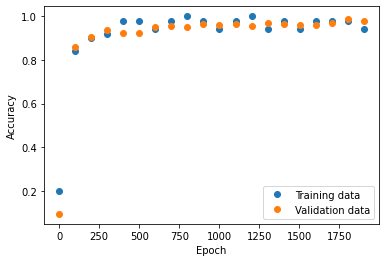

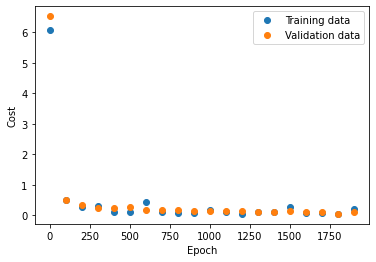

In [ ]:
#
# Set parameters for training; cross entropy loss function, with the Adam optimiser
#
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#
# Run the training over 20000 epochs
#
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

accuracy_train=[]
accuracy_test=[]
accuracy_val=[]
cost_test=[]
cost_train=[]
cost_val=[]
epoch=[]
bestValAcc = 0
start_time = time.time()
saveBest = False

# run the CNN training phase, using batches of 50 images for each train sample.  From these
# extract the accuracy of predictions and cost in order to show the performance of the CNN 
# as a function of epoch for the test and train sample.
#
# Also compute the final performance against the validation sample.
#for i in range(20000):
for i in range(2000):
  # we can either split data and lables into two variables for the examples, or 
  # we can combine them and refer to the data examples as X[0] and the labels as
  # X[1] as shown for the train and test examples in the following.
  batch_img, batch_lbl = mnist.train.next_batch(50)
  testbatch = mnist.test.next_batch(50)
  valbatch = mnist.validation.next_batch(int(noval/10))

# train the hyper parameters for the CNN; use a drop out keep prob of 0.5
# to promote generalisation of the network.
  train_step.run(feed_dict={x: batch_img, y_: batch_lbl, keep_prob: 0.5})

# now compute the accuracy for train/test samples as a funciton of epoch for every
# nth epoch.  For this stage ensure that the keep prob is set to 1.0 to evaluate the 
# performance of the network including all nodes (as it will ultimately be used).
  if i%100 == 0:
      train_accuracy = accuracy.eval(feed_dict={x:batch_img, y_: batch_lbl, keep_prob: 1.0})
      print("step %5d, training accuracy %06.4f"%(i, train_accuracy),end='  ')
      val_accuracy =accuracy.eval(feed_dict={x: valbatch[0], y_: valbatch[1], keep_prob: 1.0})
      print("validation accuracy %06.4f"%val_accuracy)
      cost_train.append(sess.run(cross_entropy, feed_dict={x: batch_img, y_: batch_lbl, keep_prob: 1.0}))
      cost_val.append( sess.run(cross_entropy, feed_dict={x: valbatch[0], y_: valbatch[1], keep_prob: 1.0}) )
      accuracy_train.append(train_accuracy)
      accuracy_val.append(val_accuracy)
      epoch.append(i+1)

print("Training phase finished")
duration = time.time() - start_time
print('(%.3f sec)' % duration)
  
print("--- accuracy of the last model ---")
trnAcc, tstAcc,valAcc = calAcc()


plt.plot(epoch, accuracy_train, 'o', label='Training data')
plt.plot(epoch, accuracy_val, 'o', label='Validation data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc=4)
plt.show()

plt.plot(epoch, cost_train, 'o', label='Training data')
plt.plot(epoch, cost_val, 'o', label='Validation data')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend()
plt.show()